## Name: Surya Roshan Mugada
## Github ID: roshan-99
## USC ID: 6545904818

In [157]:
import pandas as pd
from sklearn.impute import SimpleImputer
import numpy as np
import seaborn as sns
import math

import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import xgboost
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

### 1) a) downloaded the dataset

In [123]:
train_df=pd.read_csv('../Data/aps_failure_training_set.csv',skiprows=20)
test_df=pd.read_csv('../Data/aps_failure_test_set.csv',skiprows=20)

In [124]:
whole_df= pd.concat([train_df,test_df],ignore_index=True)

In [125]:
whole_df

class  aa_000 ab_000      ac_000 ad_000 ae_000 af_000 ag_000 ag_001  \
0       neg   76698     na  2130706438    280      0      0      0      0   
1       neg   33058     na           0     na      0      0      0      0   
2       neg   41040     na         228    100      0      0      0      0   
3       neg      12      0          70     66      0     10      0      0   
4       neg   60874     na        1368    458      0      0      0      0   
...     ...     ...    ...         ...    ...    ...    ...    ...    ...   
75995   neg   81852     na  2130706432    892      0      0      0      0   
75996   neg      18      0          52     46      8     26      0      0   
75997   neg   79636     na        1670   1518      0      0      0      0   
75998   neg     110     na          36     32      0      0      0      0   
75999   neg       8      0           6      4      2      2      0      0   

      ag_002  ...   ee_002  ee_003  ee_004  ee_005  ee_006  ee_007  ee_008  \
0          0  ...  1240520  493384  721044  469792  339156  157956   73224   
1          0  ...   421400  178064  293306  245416  133654   81140   97576   
2          0  ...   277378  159812  423992  409564  320746  158022   95128   
3          0  ...      240      46      58      44      10       0       0   
4          0  ...   622012  229790  405298  347188  286954  311560  433954   
...      ...  ...      ...     ...     ...     ...     ...     ...     ...   
75995      0  ...   632658  273242  510354  373918  349840  317840  960024   
75996      0  ...      266      44      46      14       2       0       0   
75997      0  ...   806832  449962  778826  581558  375498  222866  358934   
75998      0  ...      588     210     180     544    1004    1338      74   
75999      0  ...       46      10      48      14      42      46       0   

      ee_009 ef_000 eg_000  
0          0      0      0  
1       1500      0      0  
2        514      0      0  
3          0      4     32  
4       1218      0      0  
...      ...    ...    ...  
75995  25566      0      0  
75996      0      0      0  
75997  19548      0      0  
75998      0      0      0  
75999      0      0      0  

[76000 rows x 171 columns]

### 1) b) i) Applying mean for missing values

In [126]:
def replace_with_nans(x):
    if x == 'na':
        return np.nan
    else :
        return x
for col in whole_df.columns:
    #print(col)
    whole_df[col]=whole_df[col].apply(lambda x:replace_with_nans(x))

In [127]:
whole_df

class  aa_000 ab_000      ac_000 ad_000 ae_000 af_000 ag_000 ag_001  \
0       neg   76698    NaN  2130706438    280      0      0      0      0   
1       neg   33058    NaN           0    NaN      0      0      0      0   
2       neg   41040    NaN         228    100      0      0      0      0   
3       neg      12      0          70     66      0     10      0      0   
4       neg   60874    NaN        1368    458      0      0      0      0   
...     ...     ...    ...         ...    ...    ...    ...    ...    ...   
75995   neg   81852    NaN  2130706432    892      0      0      0      0   
75996   neg      18      0          52     46      8     26      0      0   
75997   neg   79636    NaN        1670   1518      0      0      0      0   
75998   neg     110    NaN          36     32      0      0      0      0   
75999   neg       8      0           6      4      2      2      0      0   

      ag_002  ...   ee_002  ee_003  ee_004  ee_005  ee_006  ee_007  ee_008  \
0          0  ...  1240520  493384  721044  469792  339156  157956   73224   
1          0  ...   421400  178064  293306  245416  133654   81140   97576   
2          0  ...   277378  159812  423992  409564  320746  158022   95128   
3          0  ...      240      46      58      44      10       0       0   
4          0  ...   622012  229790  405298  347188  286954  311560  433954   
...      ...  ...      ...     ...     ...     ...     ...     ...     ...   
75995      0  ...   632658  273242  510354  373918  349840  317840  960024   
75996      0  ...      266      44      46      14       2       0       0   
75997      0  ...   806832  449962  778826  581558  375498  222866  358934   
75998      0  ...      588     210     180     544    1004    1338      74   
75999      0  ...       46      10      48      14      42      46       0   

      ee_009 ef_000 eg_000  
0          0      0      0  
1       1500      0      0  
2        514      0      0  
3          0      4     32  
4       1218      0      0  
...      ...    ...    ...  
75995  25566      0      0  
75996      0      0      0  
75997  19548      0      0  
75998      0      0      0  
75999      0      0      0  

[76000 rows x 171 columns]

In [128]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
whole_df.iloc[:,1:]=imp_mean.fit_transform(whole_df.iloc[:,1:])

In [129]:
whole_df

class   aa_000   ab_000        ac_000         ad_000  ae_000  af_000  \
0       neg  76698.0  0.72556  2.130706e+09     280.000000     0.0     0.0   
1       neg  33058.0  0.72556  0.000000e+00  150629.962105     0.0     0.0   
2       neg  41040.0  0.72556  2.280000e+02     100.000000     0.0     0.0   
3       neg     12.0  0.00000  7.000000e+01      66.000000     0.0    10.0   
4       neg  60874.0  0.72556  1.368000e+03     458.000000     0.0     0.0   
...     ...      ...      ...           ...            ...     ...     ...   
75995   neg  81852.0  0.72556  2.130706e+09     892.000000     0.0     0.0   
75996   neg     18.0  0.00000  5.200000e+01      46.000000     8.0    26.0   
75997   neg  79636.0  0.72556  1.670000e+03    1518.000000     0.0     0.0   
75998   neg    110.0  0.72556  3.600000e+01      32.000000     0.0     0.0   
75999   neg      8.0  0.00000  6.000000e+00       4.000000     2.0     2.0   

       ag_000  ag_001  ag_002  ...     ee_002    ee_003    ee_004    ee_005  \
0         0.0     0.0     0.0  ...  1240520.0  493384.0  721044.0  469792.0   
1         0.0     0.0     0.0  ...   421400.0  178064.0  293306.0  245416.0   
2         0.0     0.0     0.0  ...   277378.0  159812.0  423992.0  409564.0   
3         0.0     0.0     0.0  ...      240.0      46.0      58.0      44.0   
4         0.0     0.0     0.0  ...   622012.0  229790.0  405298.0  347188.0   
...       ...     ...     ...  ...        ...       ...       ...       ...   
75995     0.0     0.0     0.0  ...   632658.0  273242.0  510354.0  373918.0   
75996     0.0     0.0     0.0  ...      266.0      44.0      46.0      14.0   
75997     0.0     0.0     0.0  ...   806832.0  449962.0  778826.0  581558.0   
75998     0.0     0.0     0.0  ...      588.0     210.0     180.0     544.0   
75999     0.0     0.0     0.0  ...       46.0      10.0      48.0      14.0   

         ee_006    ee_007    ee_008   ee_009  ef_000  eg_000  
0      339156.0  157956.0   73224.0      0.0     0.0     0.0  
1      133654.0   81140.0   97576.0   1500.0     0.0     0.0  
2      320746.0  158022.0   95128.0    514.0     0.0     0.0  
3          10.0       0.0       0.0      0.0     4.0    32.0  
4      286954.0  311560.0  433954.0   1218.0     0.0     0.0  
...         ...       ...       ...      ...     ...     ...  
75995  349840.0  317840.0  960024.0  25566.0     0.0     0.0  
75996       2.0       0.0       0.0      0.0     0.0     0.0  
75997  375498.0  222866.0  358934.0  19548.0     0.0     0.0  
75998    1004.0    1338.0      74.0      0.0     0.0     0.0  
75999      42.0      46.0       0.0      0.0     0.0     0.0  

[76000 rows x 171 columns]

### 1)b) ii) coefficient of variation

In [130]:
cv_of_columns=whole_df.iloc[:,1:].apply(lambda x: np.std(x, ddof=1) / np.mean(x) * 100 )


In [131]:
for col in cv_of_columns.index:
    print(col,'=',cv_of_columns[col])

aa_000 = 432.8607835435785
ab_000 = 217.82725939440408
ac_000 = 216.76533085378887
ad_000 = 20672.149958176455
ae_000 = 2229.367042950331
af_000 = 1820.9015502890768
ag_000 = 9146.065359583645
ag_001 = 4208.434252956986
ag_002 = 1762.5908567425445
ag_003 = 875.3299520356667
ag_004 = 547.5116255434916
ag_005 = 296.42299310403143
ag_006 = 235.25878821684466
ag_007 = 281.24979751566855
ag_008 = 627.4980079892739
ag_009 = 3216.7057340536758
ah_000 = 231.55400947419187
ai_000 = 1850.6308128781927
aj_000 = 4314.447956358556
ak_000 = 7862.298773590765
al_000 = 911.1991221645819
am_0 = 906.7195453929419
an_000 = 225.42266522583446
ao_000 = 227.61144767667702
ap_000 = 308.58848873966315
aq_000 = 285.3471317417596
ar_000 = 1056.9202321811572
as_000 = 11388.275538316808
at_000 = 2318.705992823811
au_000 = 8608.56375114368
av_000 = 573.0485357529441
ax_000 = 385.90349934226185
ay_000 = 4090.2518755773826
ay_001 = 4924.863458526554
ay_002 = 3834.2319174677277
ay_003 = 2833.0035620783187
ay_004 = 33

### 1) b) iii) correlation matrix

In [132]:
corr=whole_df.corr()
corr.style.background_gradient(cmap='coolwarm')

C:\Users\rosha\anaconda3\lib\site-packages\pandas\io\formats\style.py:3554: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
C:\Users\rosha\anaconda3\lib\site-packages\pandas\io\formats\style.py:3555: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


### 1)b) iv) top root(170) features, scatter plot, box plots. we can see some clear distinction between the two classes for some combination of features. au_000 show clear separation between classes. other have some distinction but it is not perfectly separated. We cannot draw conclusions about the significance of features perhaps only au_000 but not all.

In [133]:
top_features_n=math.floor(170**0.5)
sorted_cvs=cv_of_columns.sort_values(ascending=False)
top_features=sorted_cvs.index[0:top_features_n]
top_features

Index(['cf_000', 'co_000', 'ad_000', 'cs_009', 'dj_000', 'as_000', 'dh_000',
       'df_000', 'ag_000', 'au_000', 'ak_000', 'az_009', 'ay_009'],
      dtype='object')

In [134]:
#class_total=top_features.append('class')
class_top_features=top_features.to_list()+['class']

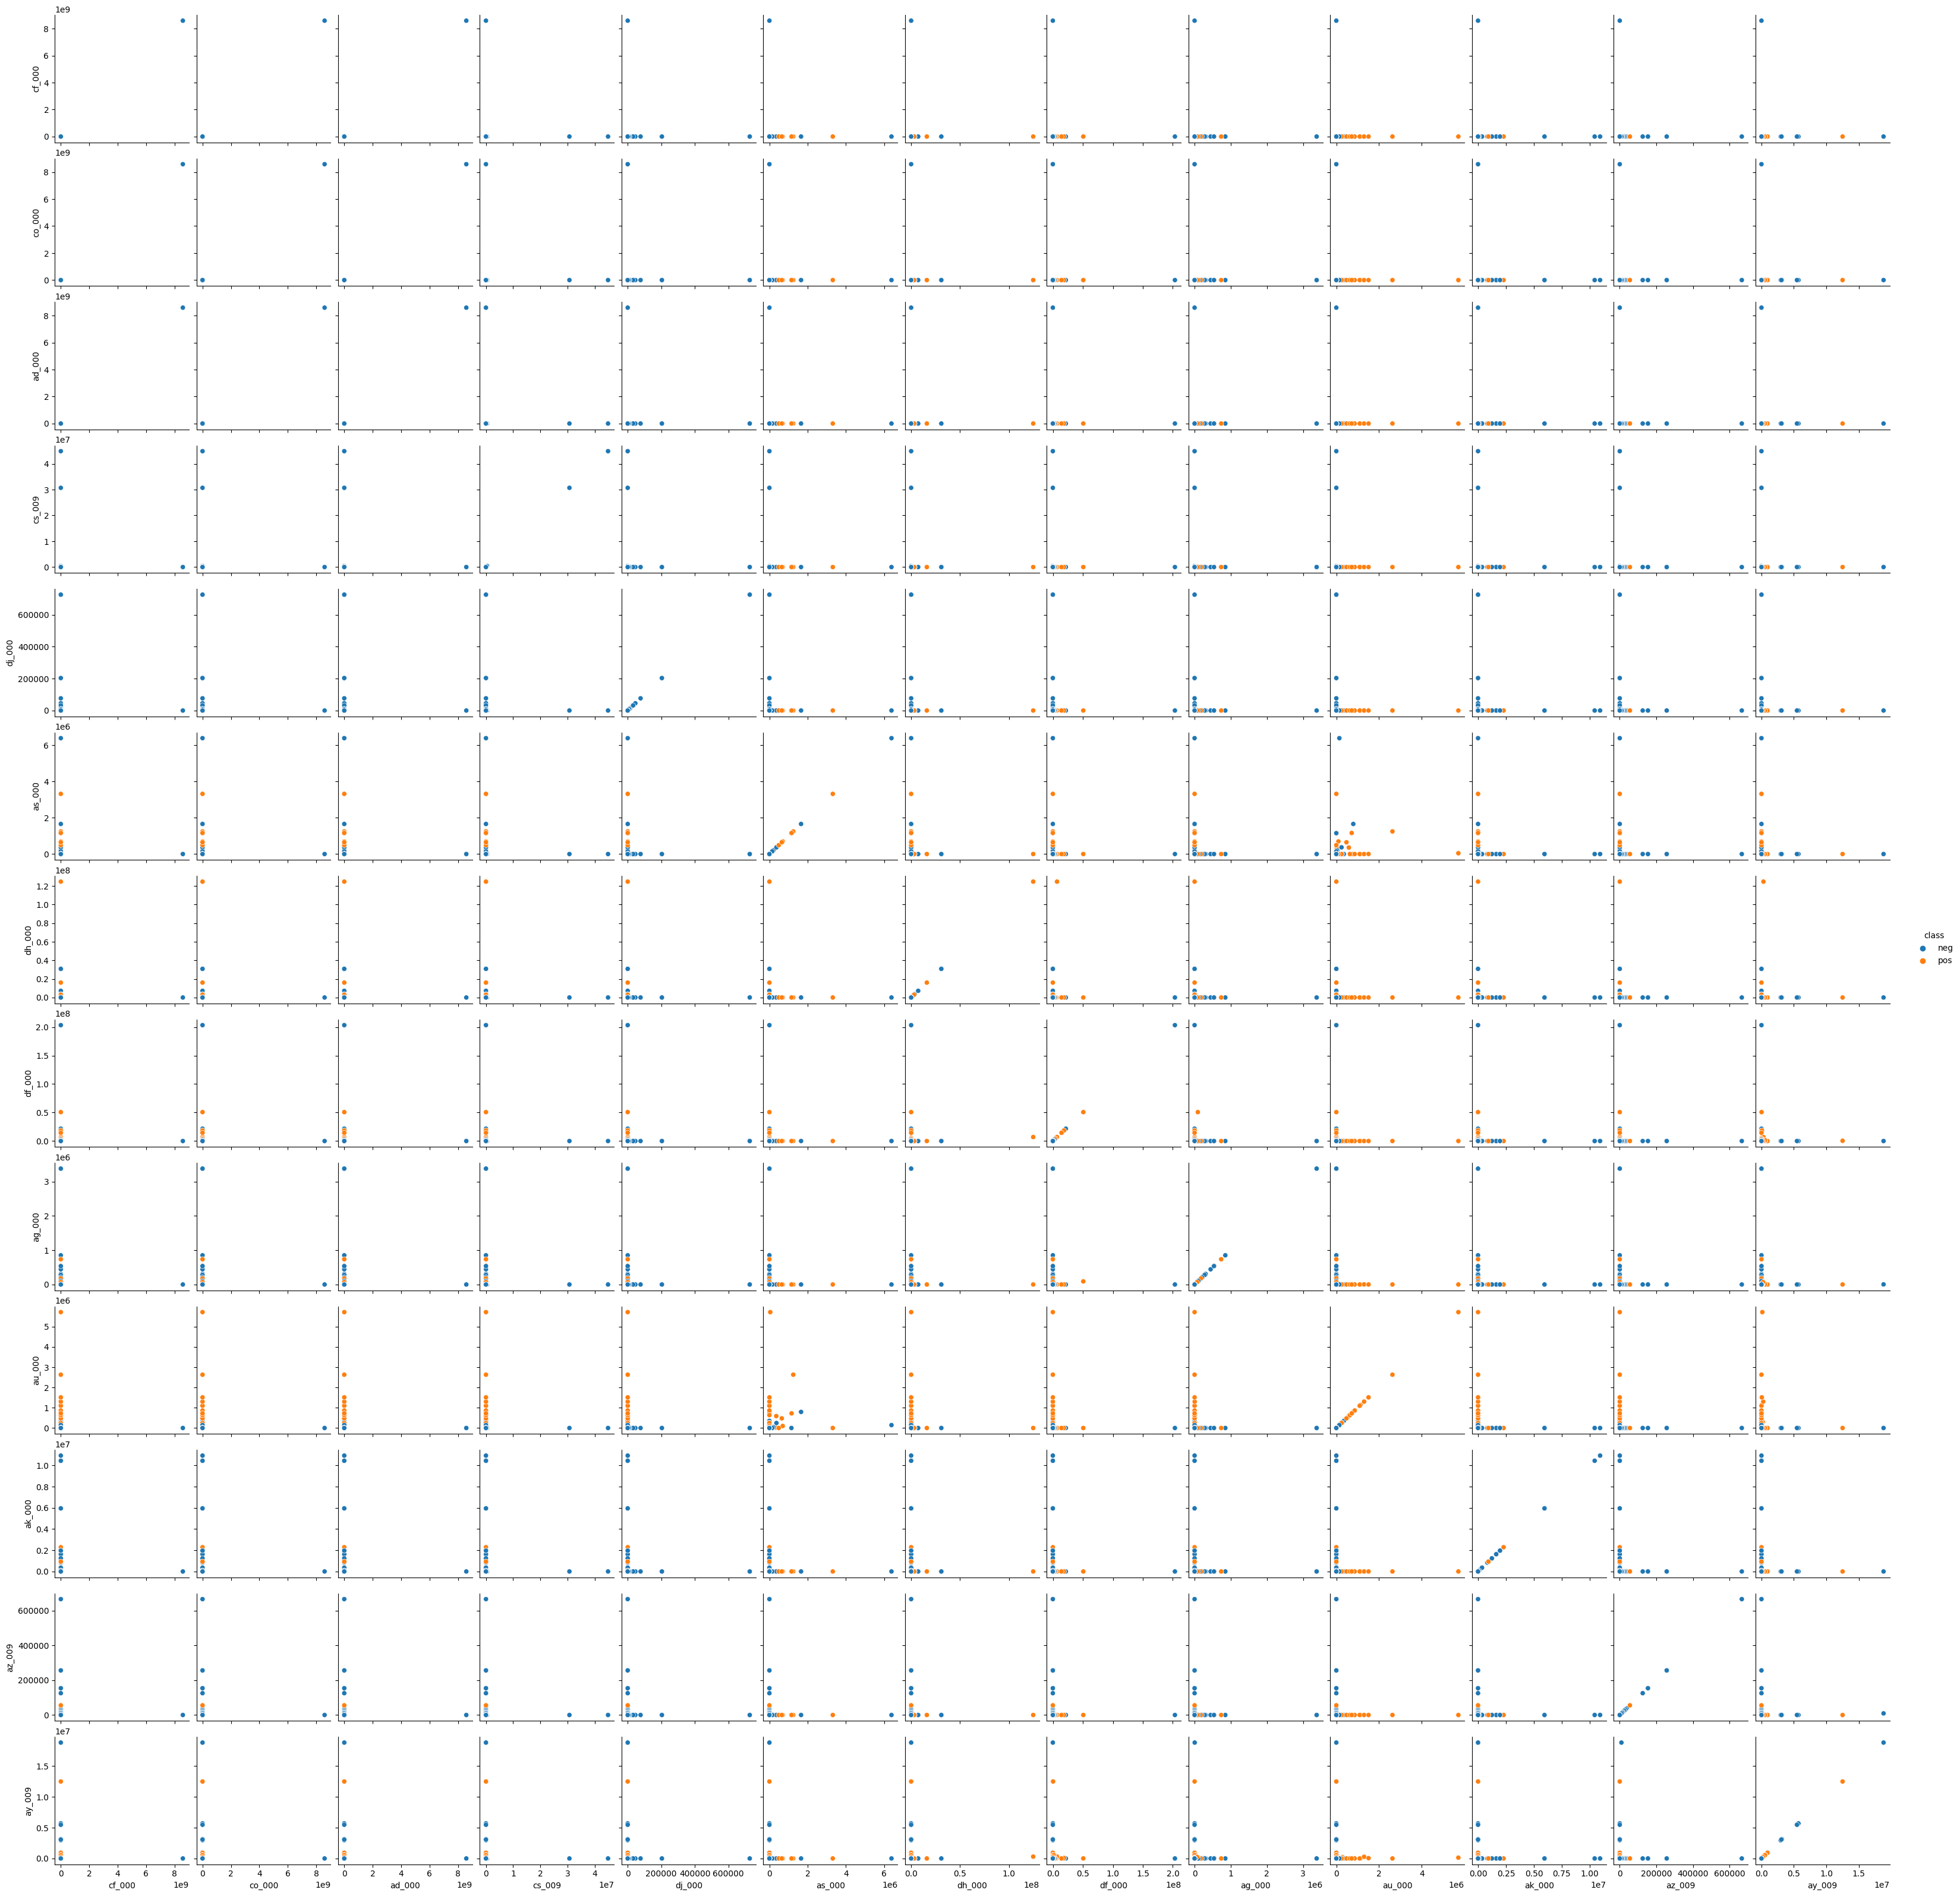

In [78]:
sns.pairplot(whole_df[class_top_features], diag_kind=None,hue='class')

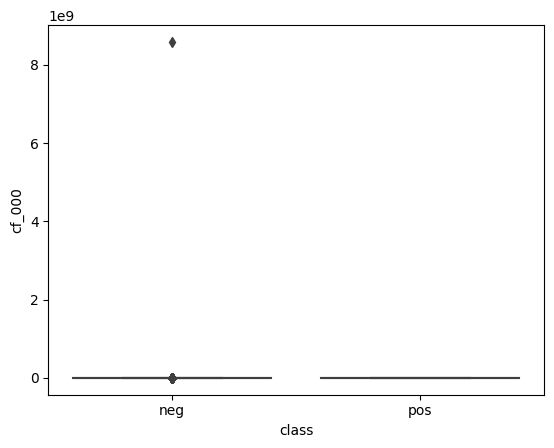

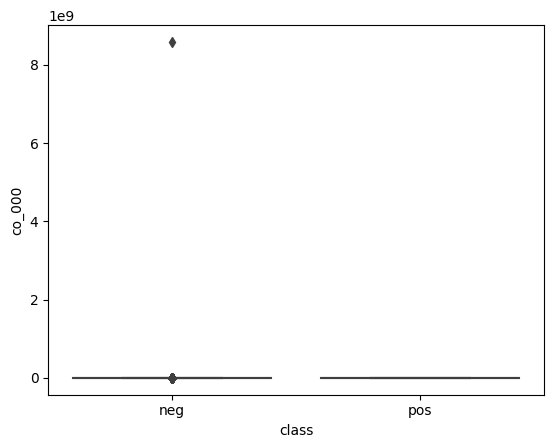

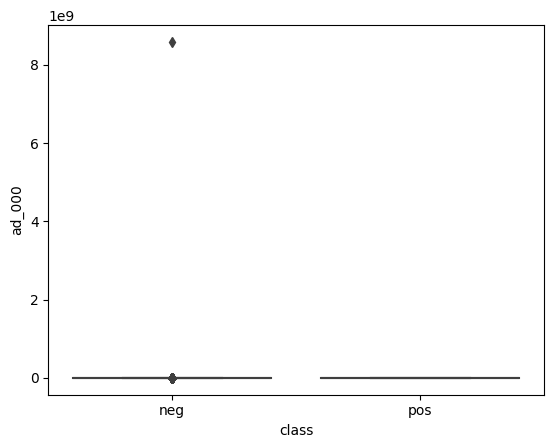

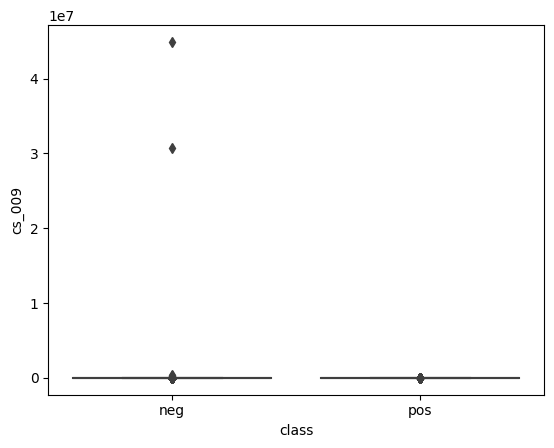

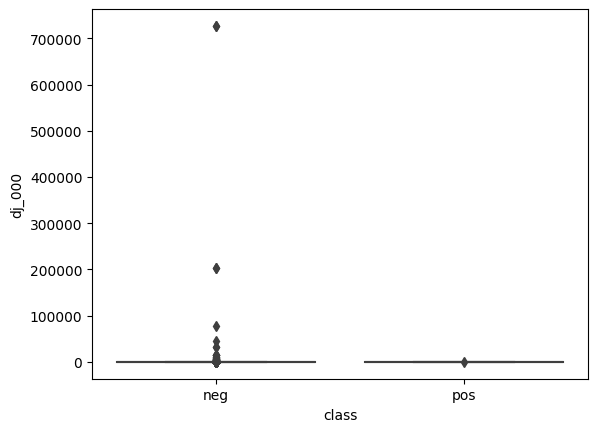

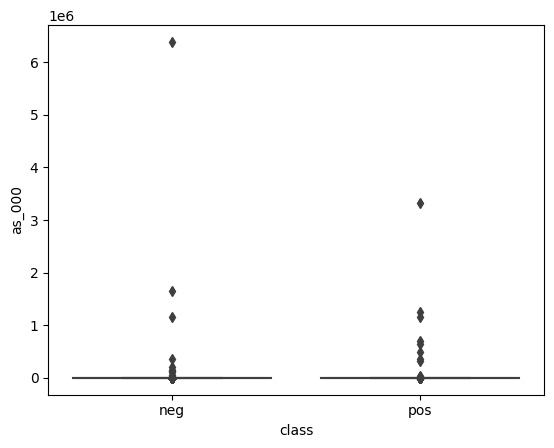

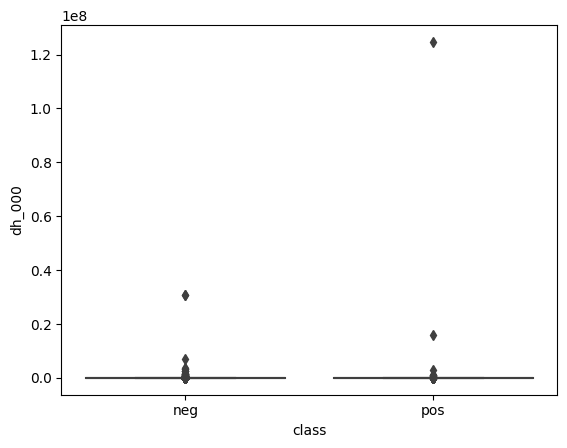

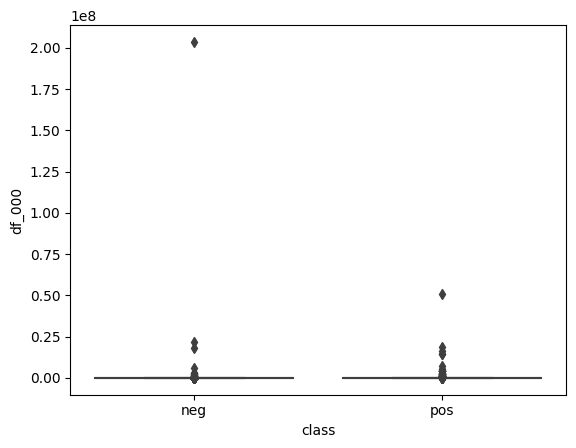

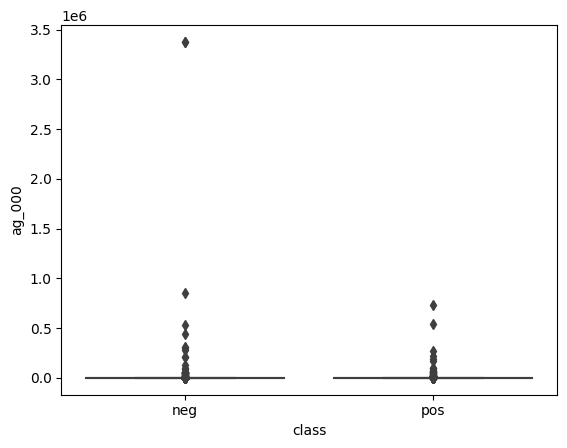

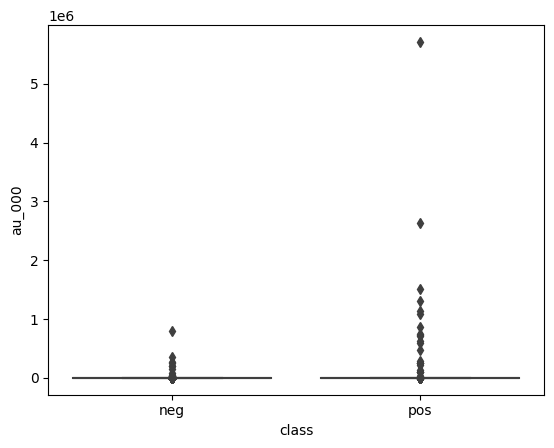

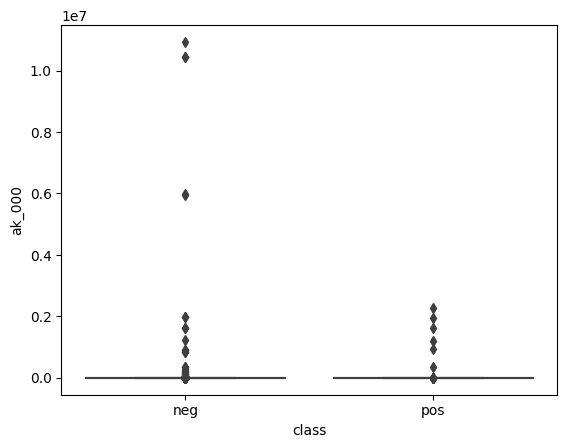

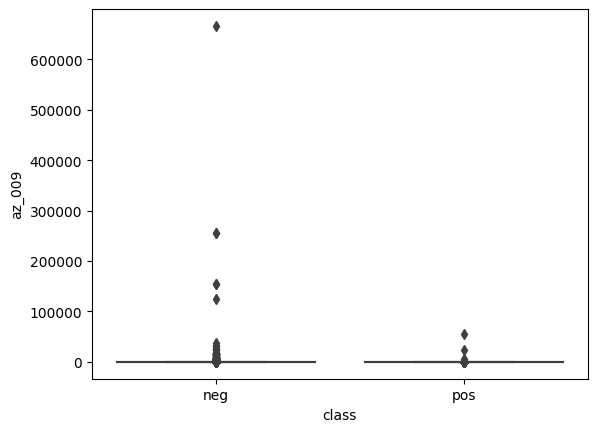

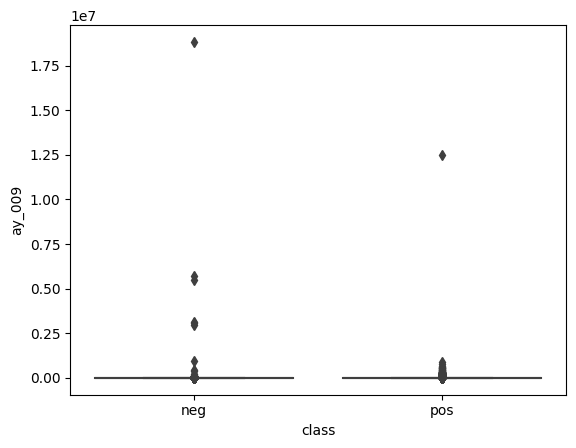

<Figure size 640x480 with 0 Axes>

In [81]:
for col in top_features:
    sns.boxplot(data=whole_df,y=col,x='class')
    plt.figure()

In [49]:
whole_df

class   aa_000   ab_000        ac_000         ad_000  ae_000  af_000  \
0       neg  76698.0  0.72556  2.130706e+09     280.000000     0.0     0.0   
1       neg  33058.0  0.72556  0.000000e+00  150629.962105     0.0     0.0   
2       neg  41040.0  0.72556  2.280000e+02     100.000000     0.0     0.0   
3       neg     12.0  0.00000  7.000000e+01      66.000000     0.0    10.0   
4       neg  60874.0  0.72556  1.368000e+03     458.000000     0.0     0.0   
...     ...      ...      ...           ...            ...     ...     ...   
15995   neg  81852.0  0.72556  2.130706e+09     892.000000     0.0     0.0   
15996   neg     18.0  0.00000  5.200000e+01      46.000000     8.0    26.0   
15997   neg  79636.0  0.72556  1.670000e+03    1518.000000     0.0     0.0   
15998   neg    110.0  0.72556  3.600000e+01      32.000000     0.0     0.0   
15999   neg      8.0  0.00000  6.000000e+00       4.000000     2.0     2.0   

       ag_000  ag_001  ag_002  ...     ee_002    ee_003    ee_004    ee_005  \
0         0.0     0.0     0.0  ...  1240520.0  493384.0  721044.0  469792.0   
1         0.0     0.0     0.0  ...   421400.0  178064.0  293306.0  245416.0   
2         0.0     0.0     0.0  ...   277378.0  159812.0  423992.0  409564.0   
3         0.0     0.0     0.0  ...      240.0      46.0      58.0      44.0   
4         0.0     0.0     0.0  ...   622012.0  229790.0  405298.0  347188.0   
...       ...     ...     ...  ...        ...       ...       ...       ...   
15995     0.0     0.0     0.0  ...   632658.0  273242.0  510354.0  373918.0   
15996     0.0     0.0     0.0  ...      266.0      44.0      46.0      14.0   
15997     0.0     0.0     0.0  ...   806832.0  449962.0  778826.0  581558.0   
15998     0.0     0.0     0.0  ...      588.0     210.0     180.0     544.0   
15999     0.0     0.0     0.0  ...       46.0      10.0      48.0      14.0   

         ee_006    ee_007    ee_008   ee_009  ef_000  eg_000  
0      339156.0  157956.0   73224.0      0.0     0.0     0.0  
1      133654.0   81140.0   97576.0   1500.0     0.0     0.0  
2      320746.0  158022.0   95128.0    514.0     0.0     0.0  
3          10.0       0.0       0.0      0.0     4.0    32.0  
4      286954.0  311560.0  433954.0   1218.0     0.0     0.0  
...         ...       ...       ...      ...     ...     ...  
15995  349840.0  317840.0  960024.0  25566.0     0.0     0.0  
15996       2.0       0.0       0.0      0.0     0.0     0.0  
15997  375498.0  222866.0  358934.0  19548.0     0.0     0.0  
15998    1004.0    1338.0      74.0      0.0     0.0     0.0  
15999      42.0      46.0       0.0      0.0     0.0     0.0  

[76000 rows x 171 columns]

### 1) b) v) there is a clear imbalance in the data. negative is 74625 and positive is 1375. Lot of imbalance

In [135]:
whole_df['class'].value_counts()

neg    74625
pos     1375
Name: class, dtype: int64

In [137]:
data=whole_df.copy()
data['class']=data['class'].apply(lambda x: 1 if x=='pos' else 0)
train_data=data.iloc[:len(train_df),:]
test_data=data.iloc[len(train_df):,:]


In [138]:
X_train,y_train=train_data.iloc[:,1:],train_data['class']
X_test,y_test=test_data.iloc[:,1:],test_data['class']

In [140]:
test_data['class'].value_counts()

0    15625
1      375
Name: class, dtype: int64

In [141]:
def print_confusion_matrix(y_true,y_pred,title):
    disp=ConfusionMatrixDisplay(confusion_matrix(y_true,y_pred))
    disp.plot()
    plt.title(title)
    plt.show()

In [142]:
def make_roc_curve(y_train,y_pred_raw,title):
    fpr, tpr, thresholds = roc_curve(y_train, y_pred_raw)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    print('AUC=',roc_auc_score(y_train,y_pred_raw))

### 1) c) random forest on imbalance dataset. OOB error is lesser than the test error but comparable

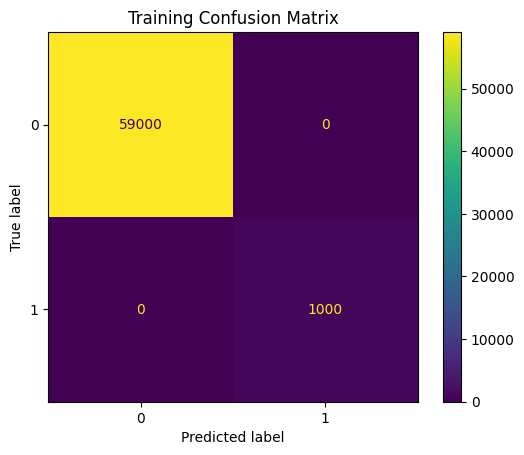

AUC= 1.0
Misclassification error= 0.0


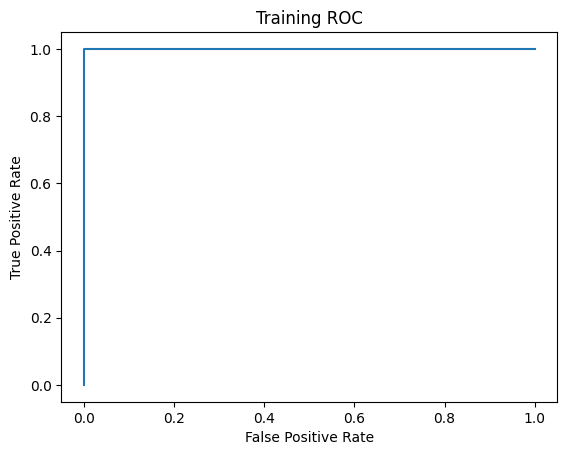

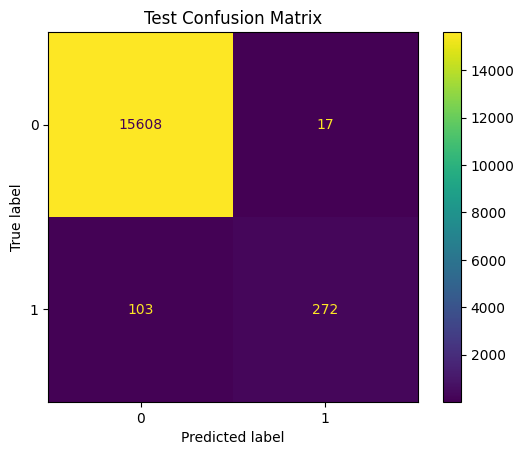

AUC= 0.9943858346666669
Misclassification error= 0.007499999999999951
Out of bag estimate = 0.006199999999999983


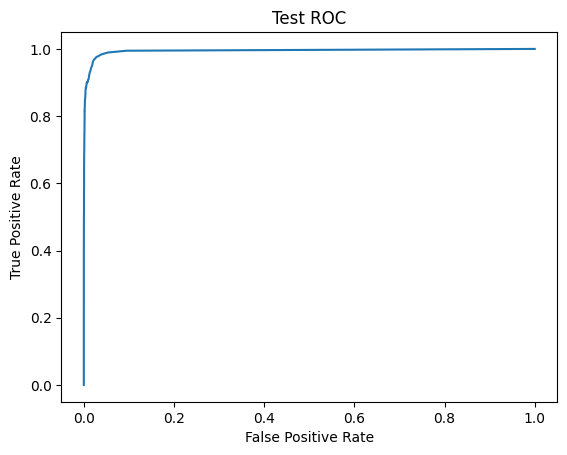

In [152]:
clf = RandomForestClassifier(oob_score=True)
clf.fit(X_train,y_train)
y_pred_train=clf.predict(X_train)
y_pred_prob_train=clf.predict_proba(X_train)[:,1]
y_pred_test=clf.predict(X_test)
y_pred_prob_test=clf.predict_proba(X_test)[:,1]
print_confusion_matrix(y_train,y_pred_train,'Training Confusion Matrix')
make_roc_curve(y_train,y_pred_prob_train,'Training ROC')
##misclassification error 
print('Misclassification error=',1-accuracy_score(y_train,y_pred_train))

print_confusion_matrix(y_test,y_pred_test,'Test Confusion Matrix')
make_roc_curve(y_test,y_pred_prob_test,'Test ROC')
##misclassification error 
print('Misclassification error=',1-accuracy_score(y_test,y_pred_test))
print('Out of bag estimate =',1-clf.oob_score_)

### 1) d) random forest with balanced dataset using class_weight=balanced. OOB error is lesser than test error. 
#### The imbalanced data random forest has less test error compared to the random forest obtained by balancing. Even the imbalanced random forest has more AuC

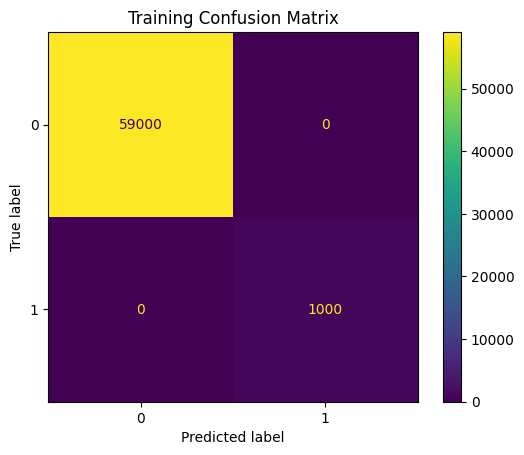

AUC= 1.0
Misclassification error= 0.0


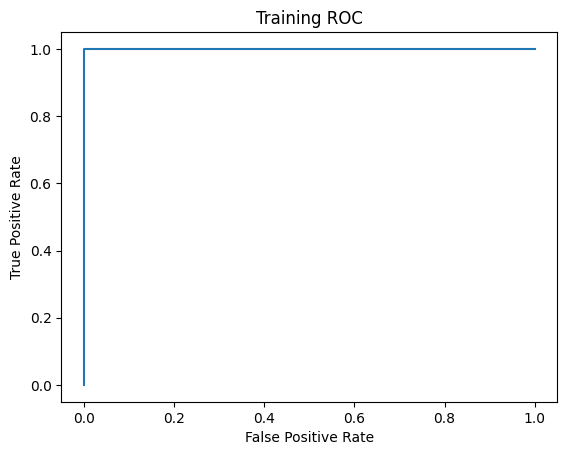

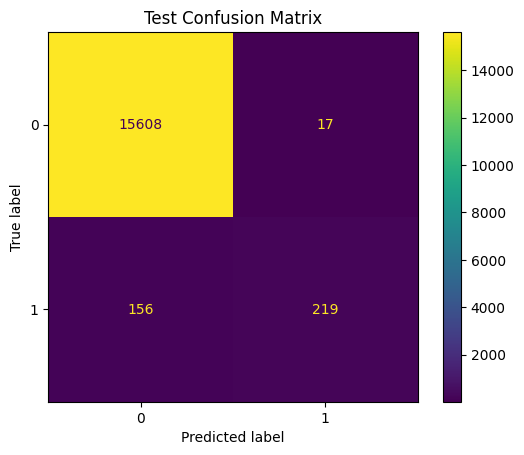

AUC= 0.99316864
Misclassification error= 0.010812500000000003
Out of bag estimate = 0.007816666666666694


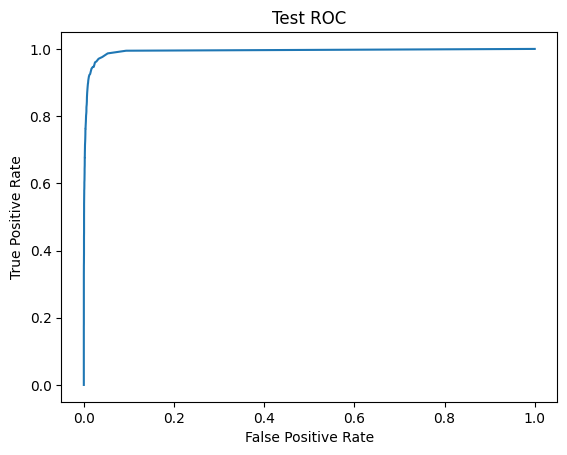

In [153]:

clf = RandomForestClassifier(oob_score=True,class_weight='balanced')
clf.fit(X_train,y_train)
y_pred_train=clf.predict(X_train)
y_pred_prob_train=clf.predict_proba(X_train)[:,1]
y_pred_test=clf.predict(X_test)
y_pred_prob_test=clf.predict_proba(X_test)[:,1]
print_confusion_matrix(y_train,y_pred_train,'Training Confusion Matrix')
make_roc_curve(y_train,y_pred_prob_train,'Training ROC')
##misclassification error 
print('Misclassification error=',1-accuracy_score(y_train,y_pred_train))

print_confusion_matrix(y_test,y_pred_test,'Test Confusion Matrix')
make_roc_curve(y_test,y_pred_prob_test,'Test ROC')
##misclassification error 
print('Misclassification error=',1-accuracy_score(y_test,y_pred_test))
print('Out of bag estimate =',1-clf.oob_score_)

### 1) e) XGBoost, finding the alpha using cross validation and training and testing on that alpha
The test error is more than the validation error of the best model. 

In [162]:
alpha_list=[10**i for i in range(-4,4)]
alpha_list+=[i/100 for i in range(25,1000,25)]
param_dict={'reg_alpha':alpha_list}
xgb_classifier=xgboost.XGBClassifier(objective='reg:logistic')
grid_cv=GridSearchCV(xgb_classifier,param_dict)
grid_cv.fit(X_train,y_train)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_to_...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None,
                                     objective='reg:logistic', predictor=None,
                                     random_state=None, reg_alpha=None, ...),
             param_grid={'reg_alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                       1000, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5,
                                       1.75, 2.0, 2.25, 2.5, 2.75, 3.0, 3.25,
                                       3.5, 3.75, 4.0, 4.25, 4.5, 4.75, 5.0,
                                       5.25, 5.5, ...]})

In [165]:
print(grid_cv.best_params_)
print(grid_cv.best_score_)


{'reg_alpha': 0.5}
0.9947000000000001


In [175]:
print(1-grid_cv.best_score_)

0.00529999999999986


#### please ignore the out of error estimate that is printed below.

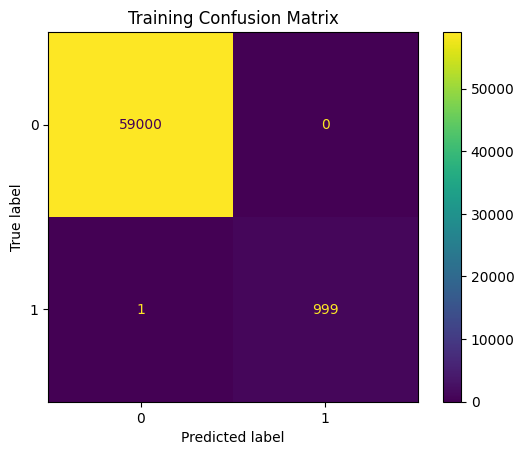

AUC= 0.9999958728813559
Misclassification error= 1.666666666666483e-05


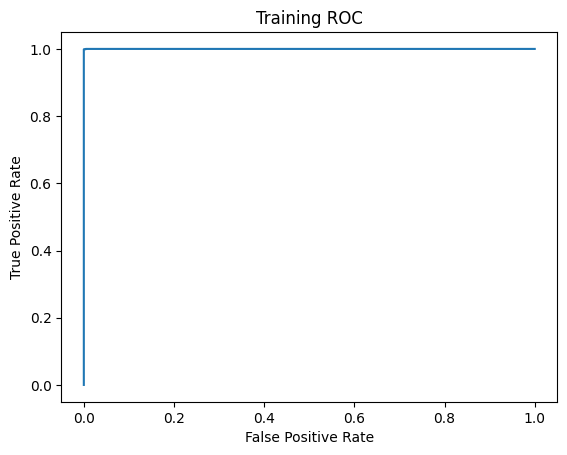

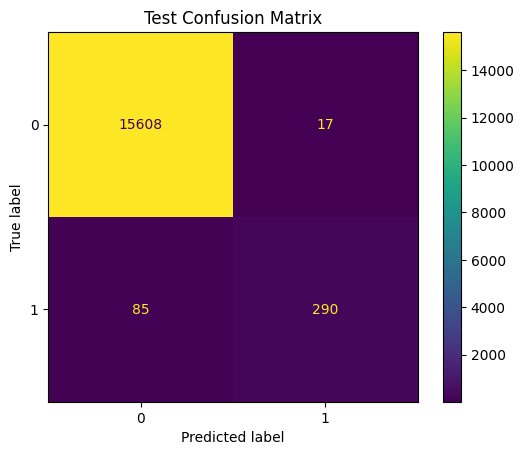

AUC= 0.994996736
Misclassification error= 0.0063750000000000195
Out of bag estimate = 0.007816666666666694


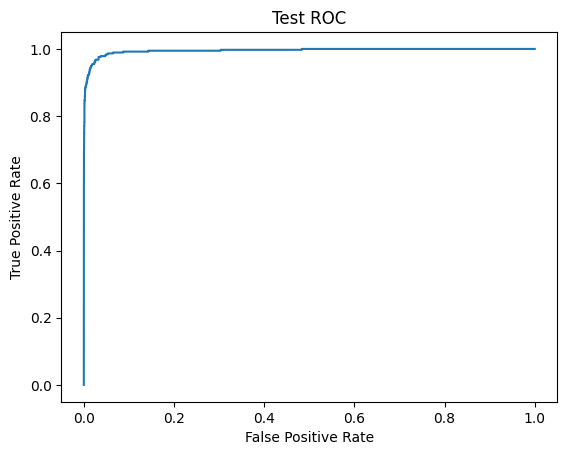

In [168]:

xgb_best=grid_cv.best_estimator_
#xgb_best=xgboost.XGBClassifier(objective='reg:logistic',reg_alpha=grid_cv.best_params_['reg_alpha'])
xgb_best.fit(X_train,y_train)
y_pred_train=xgb_best.predict(X_train)
y_pred_prob_train=xgb_best.predict_proba(X_train)[:,1]

y_pred_test=xgb_best.predict(X_test)
y_pred_prob_test=xgb_best.predict_proba(X_test)[:,1]

print_confusion_matrix(y_train,y_pred_train,'Training Confusion Matrix')
make_roc_curve(y_train,y_pred_prob_train,'Training ROC')
##misclassification error 
print('Misclassification error=',1-accuracy_score(y_train,y_pred_train))

print_confusion_matrix(y_test,y_pred_test,'Test Confusion Matrix')
make_roc_curve(y_test,y_pred_prob_test,'Test ROC')
##misclassification error 
print('Misclassification error=',1-accuracy_score(y_test,y_pred_test))
print('Out of bag estimate =',1-clf.oob_score_)

### 1)f) Using smote to manage the imbalance. right way to do smote during cross validation is to only apply smote to the train folds and leave the validation fold untouched. Below shows the right implemented way.

#### uncompensated case has less test error than the compensated case . But checking the confusion matrix we see more classifications to the smaller class so it might be a good idea to use smote to balance the data

The test error is more than the validation error but slightly.

In [172]:
from sklearn.model_selection import KFold
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score
from statistics import mean
alpha_list=[10**i for i in range(-4,4)]
kf = KFold(n_splits=5)
for alpha in alpha_list:
    cv_score=[]
    print('alpha=',alpha)
    for fold, (train_index, test_index) in enumerate(kf.split(X_train), 1):
        X_train_fold = X_train.iloc[train_index,:]
        y_train_fold = y_train.iloc[train_index]
        X_test_fold = X_train.iloc[test_index,:]
        y_test_fold = y_train.iloc[test_index]  
        sm = SMOTE()
        X_train_oversampled, y_train_oversampled = sm.fit_resample(X_train_fold, y_train_fold)
        model = xgboost.XGBClassifier(objective='reg:logistic',reg_alpha=alpha)
        model.fit(X_train_oversampled, y_train_oversampled )  
        y_pred = model.predict(X_test_fold)
        cv_score.append(accuracy_score(y_test_fold,y_pred))
        print(f'For fold {fold}:')
        print(f'Accuracy: {accuracy_score( y_test_fold,y_pred)}')
        print(f'f-score: {f1_score(y_test_fold, y_pred)}')
    print('alpha=',alpha,' cv score=',mean(cv_score))

alpha= 0.0001
For fold 1:
Accuracy: 0.99325
f-score: 0.8195991091314032
For fold 2:
Accuracy: 0.9933333333333333
f-score: 0.8113207547169812
For fold 3:
Accuracy: 0.99225
f-score: 0.7633587786259542
For fold 4:
Accuracy: 0.9935833333333334
f-score: 0.7989556135770235
For fold 5:
Accuracy: 0.9935
f-score: 0.7903225806451613
alpha= 0.0001  cv score= 0.9931833333333333
alpha= 0.001
For fold 1:
Accuracy: 0.99325
f-score: 0.8219780219780219
For fold 2:
Accuracy: 0.994
f-score: 0.8309859154929577
For fold 3:
Accuracy: 0.993
f-score: 0.7868020304568527
For fold 4:
Accuracy: 0.9935
f-score: 0.7979274611398964
For fold 5:
Accuracy: 0.9936666666666667
f-score: 0.7978723404255319
alpha= 0.001  cv score= 0.9934833333333334
alpha= 0.01
For fold 1:
Accuracy: 0.9926666666666667
f-score: 0.8061674008810574
For fold 2:
Accuracy: 0.9944166666666666
f-score: 0.8430913348946135
For fold 3:
Accuracy: 0.9925833333333334
f-score: 0.7746835443037974
For fold 4:
Accuracy: 0.9940833333333333
f-score: 0.81653746

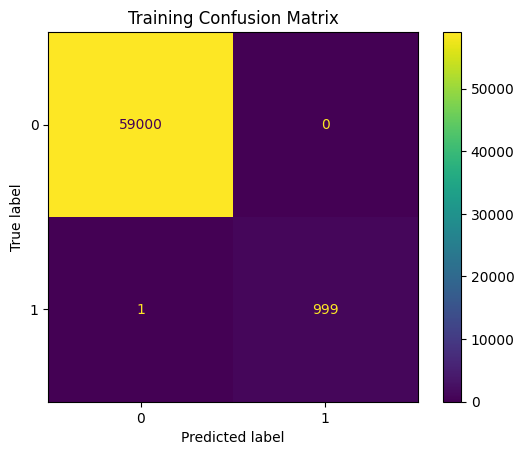

AUC= 0.9999987966101694
Misclassification error= 1.666666666666483e-05


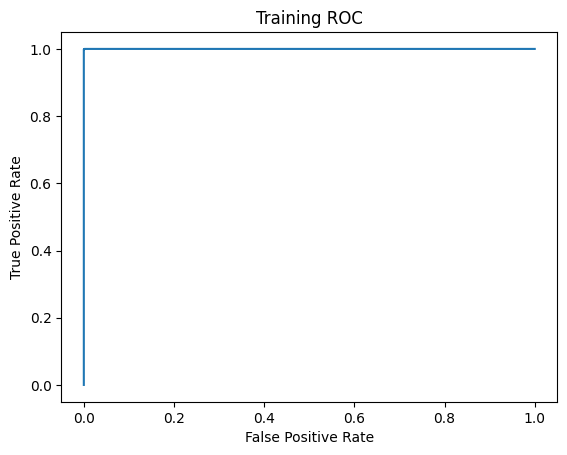

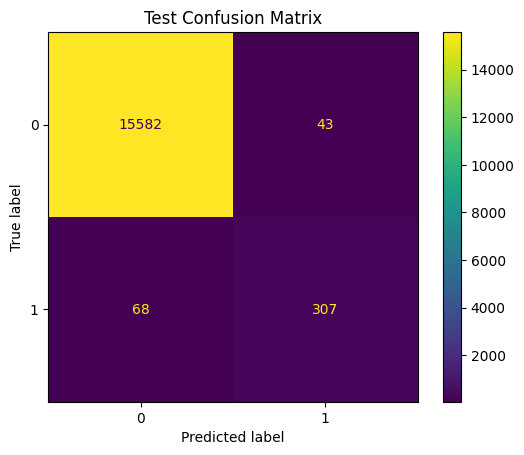

AUC= 0.9938464426666667
Misclassification error= 0.006937500000000041


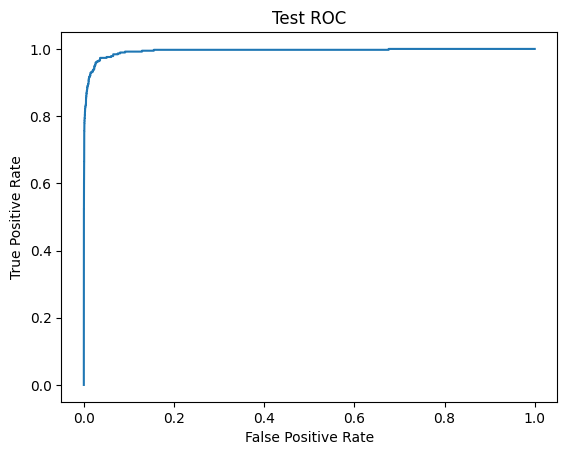

In [173]:
#best alpha = 0.1 

xgb_best_smote=xgboost.XGBClassifier(objective='reg:logistic',reg_alpha=0.1)
sm = SMOTE()
X_train_oversampled, y_train_oversampled = sm.fit_resample(X_train, y_train)
xgb_best_smote.fit(X_train_oversampled,y_train_oversampled)
y_pred_train=xgb_best_smote.predict(X_train)
y_pred_prob_train=xgb_best_smote.predict_proba(X_train)[:,1]

y_pred_test=xgb_best_smote.predict(X_test)
y_pred_prob_test=xgb_best_smote.predict_proba(X_test)[:,1]

print_confusion_matrix(y_train,y_pred_train,'Training Confusion Matrix')
make_roc_curve(y_train,y_pred_prob_train,'Training ROC')
##misclassification error 
print('Misclassification error=',1-accuracy_score(y_train,y_pred_train))

print_confusion_matrix(y_test,y_pred_test,'Test Confusion Matrix')
make_roc_curve(y_test,y_pred_prob_test,'Test ROC')
##misclassification error 
print('Misclassification error=',1-accuracy_score(y_test,y_pred_test))


### 2. ISLR 6.6.3

a) As we increase s from 0. the train error will reduce steadily. When s=0, then there is lot of error since all the Bi would be 0. As we increase s value, the Bi value would increase and would stabilize at the least square error value.The model will overfit on the training data letting all Bi to have some value which would lead to least train error. 

b) As we increase s from 0, the test error will reduce initially and then start increasing in a U shape. As s value increases the Bi start to take on some value and the test error will drop. But as the s value grows more, it allows for more Bi to take value and start overfitting on the train data. This causes the test RSS to reduce due to the overfitting having less bias but more variance. 

c)variance increases steadily. The variance is 0 when s is 0 because there is a constant model. As s increases the model starts becoming more flexible due to more Bi taking values and thus increasing the variance. Hence variance increases steadily.

d) square bias constantly decreases. When s is 0, the bias is very high since the model basically predicts same constant value. As more Bi come into picture, the bias reduces and as the model overfits on the data, the bias goes lower and lower.

e) Irreducible error is constant. This does not depend on the model or s or any other hyperparameters whatsoever and always is constant.

### 3. ISLR 6.6.5

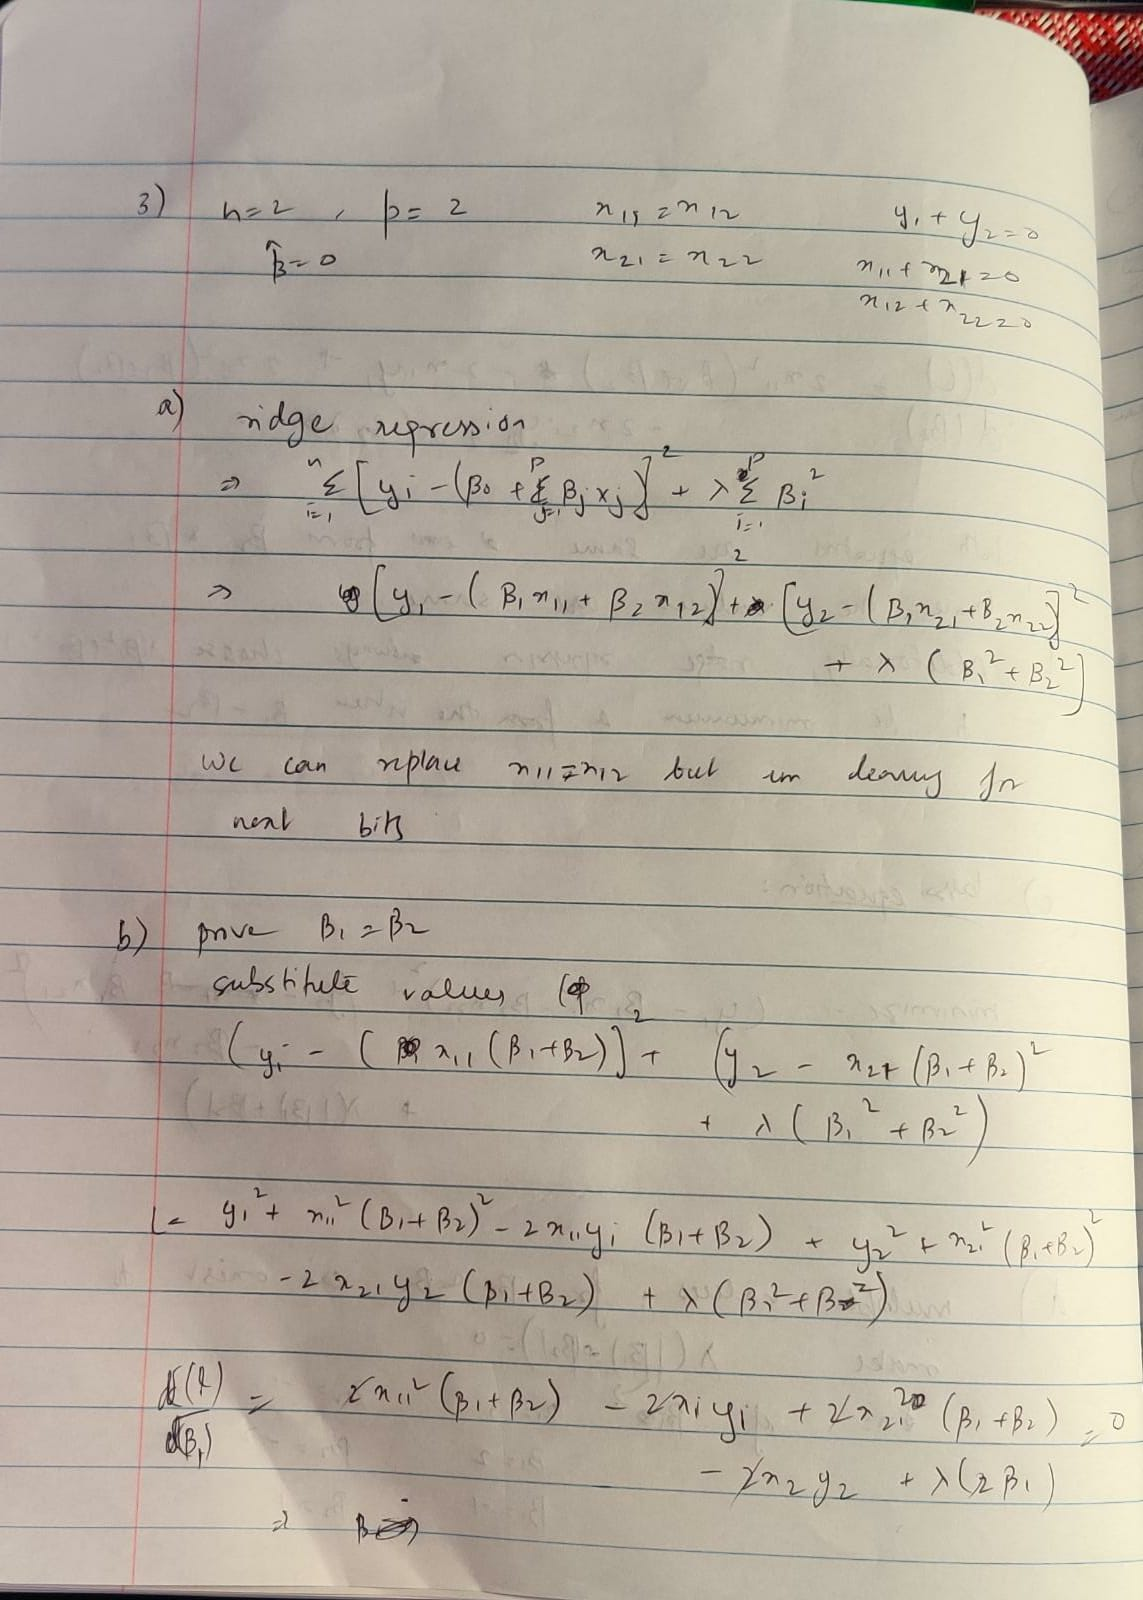



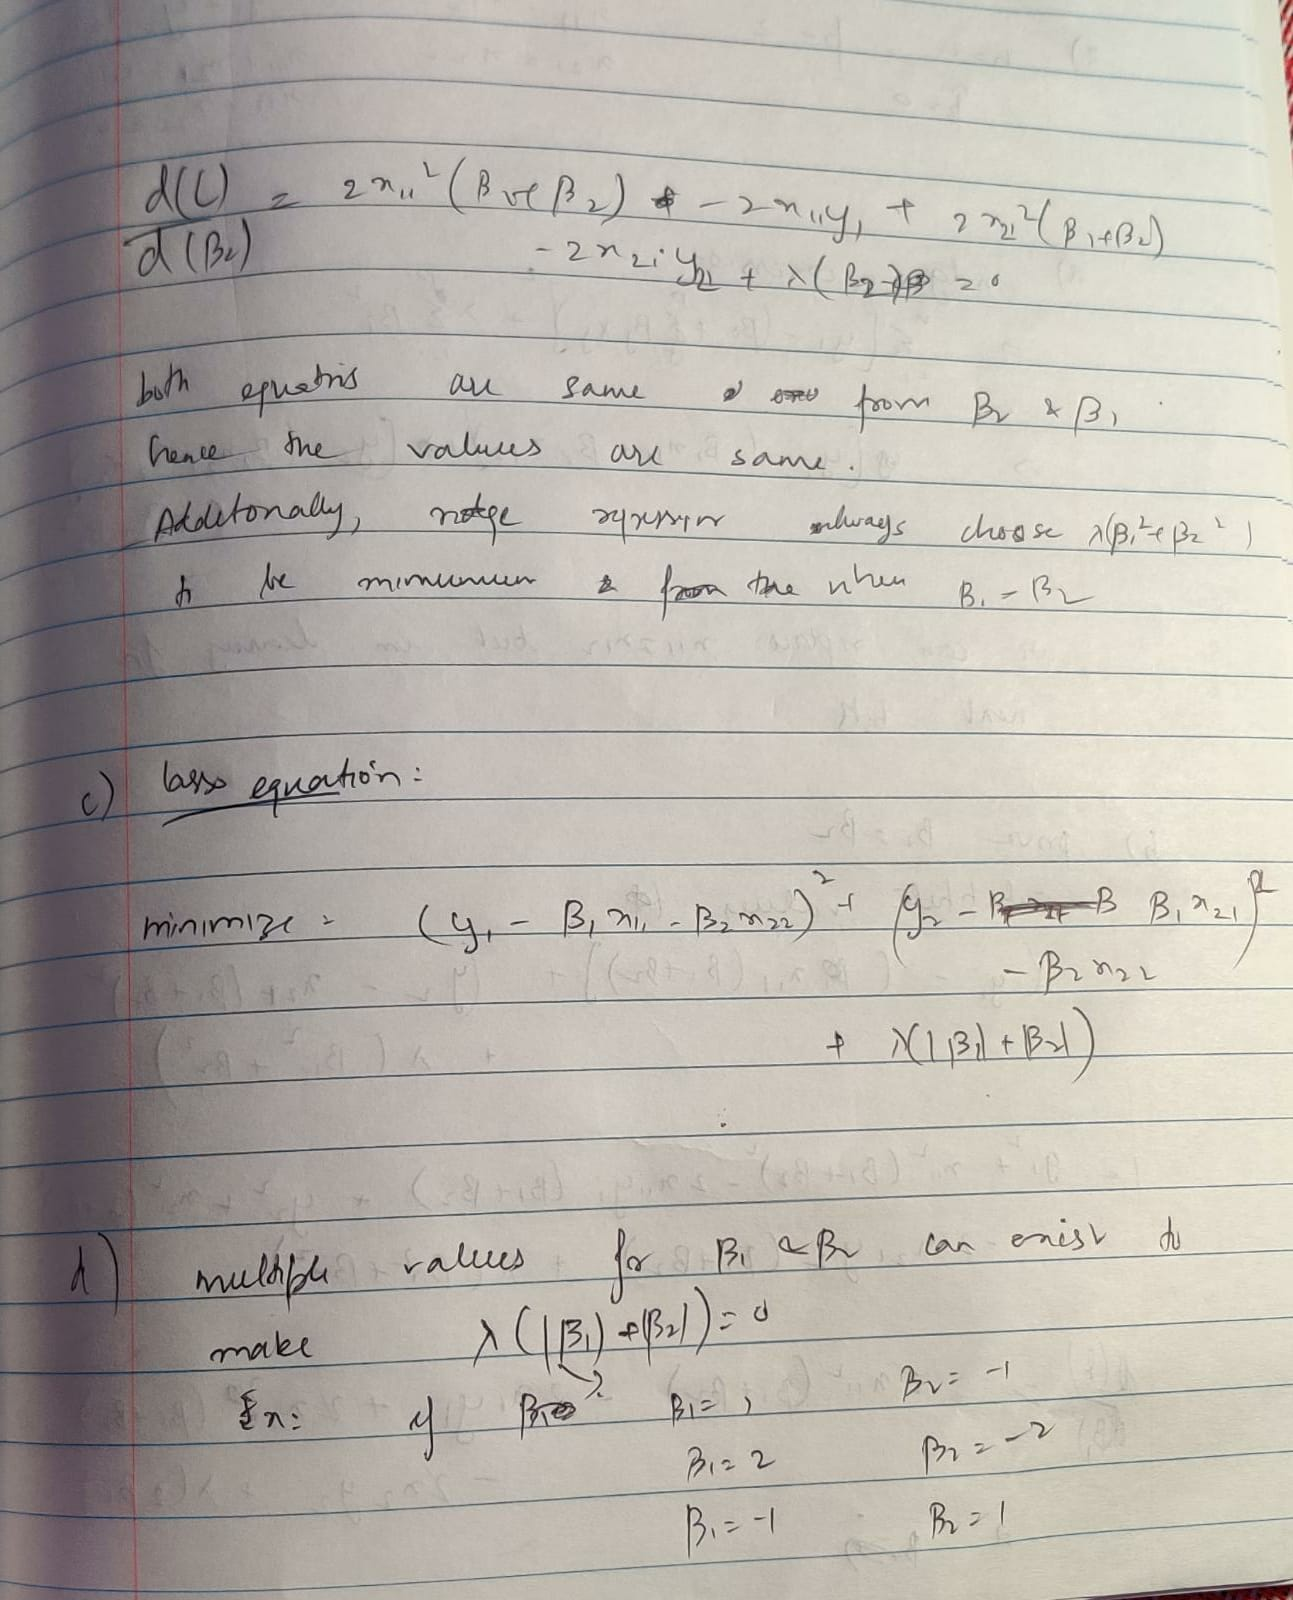

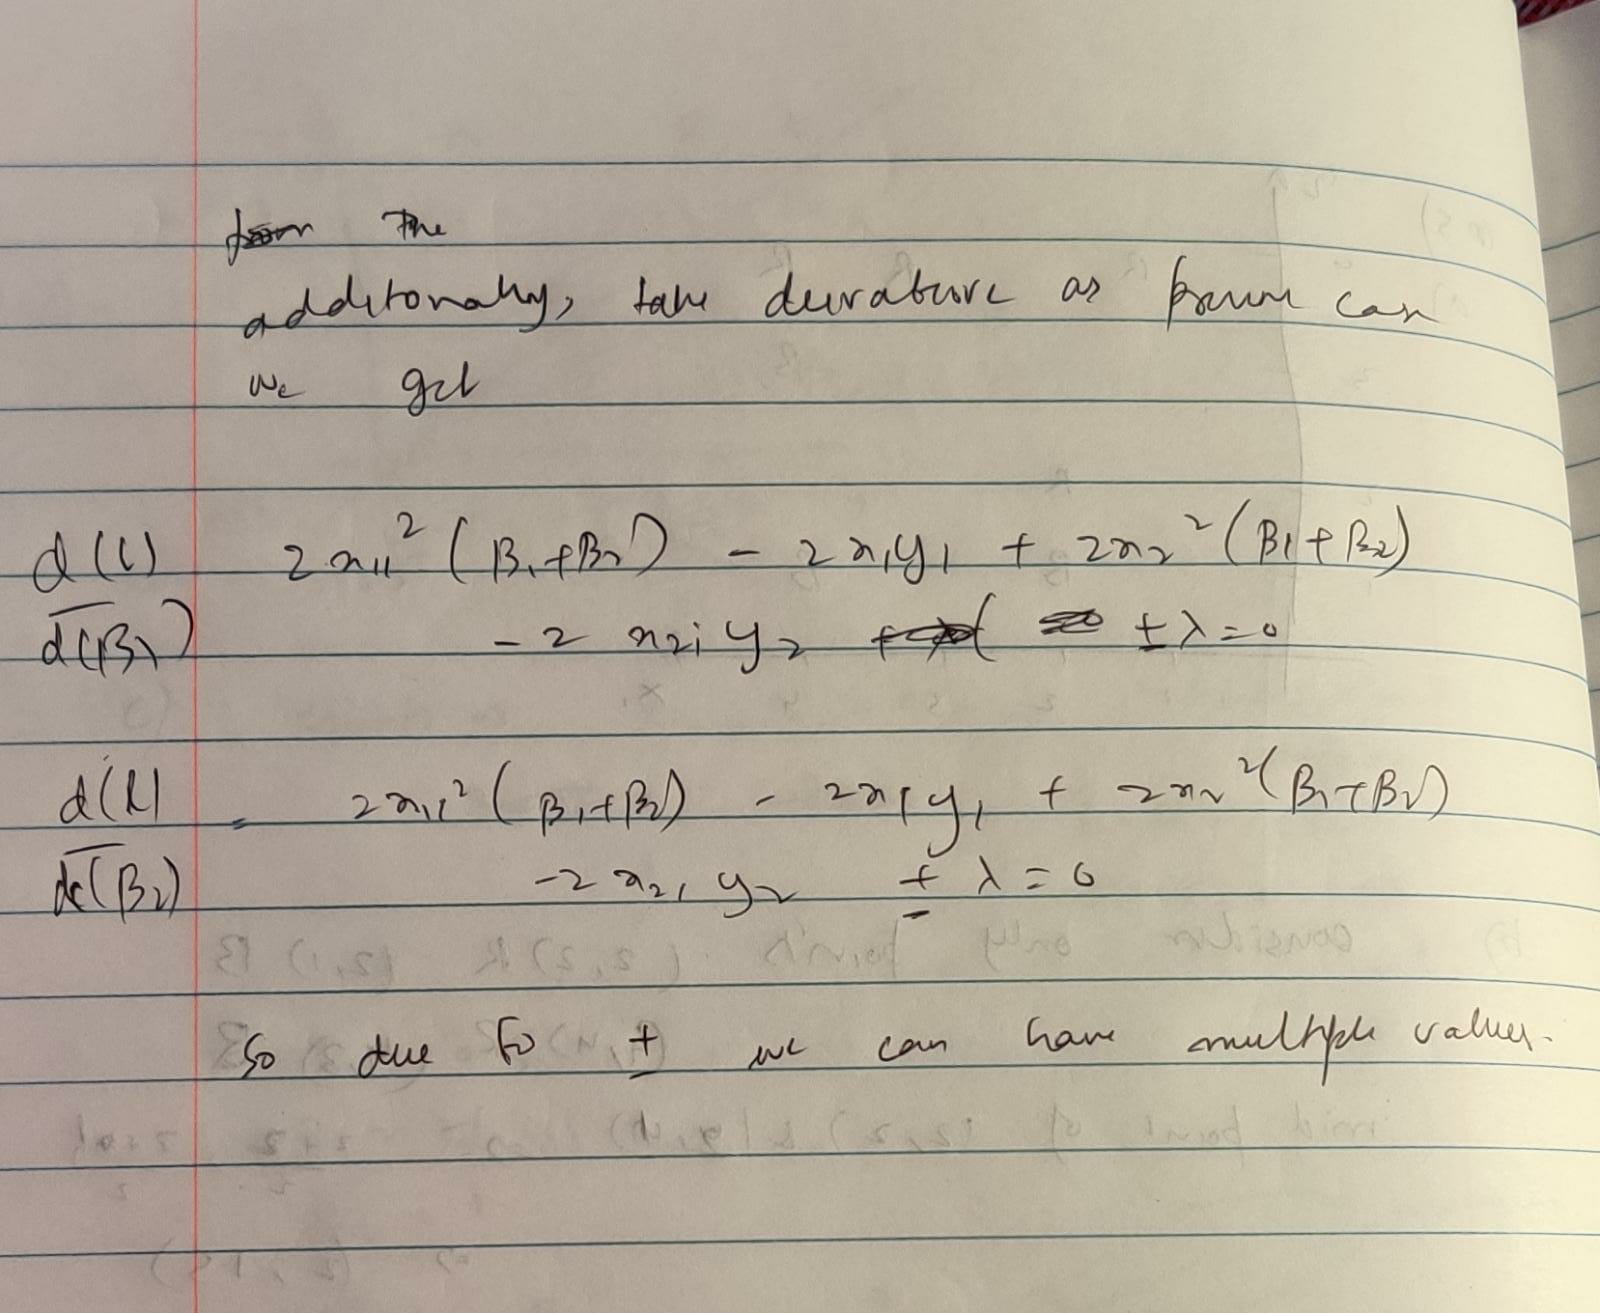

### 4. ISLR 8.4.5
1) majority approach -> total predictions which have 6 values which are greater than 0.5 and 4 of them less than 0.5. majority says more than 0.5 meaning P(class in red/X)= true.

2) Average approach -> (0.1+0.15+0.2+0.2+0.55+0.6+0.6+0.65+0.7+0.75)/10 => 0.45. which mean P(class in red/X)= False and would be classified as green.

### 5 ISLR 9.7.3
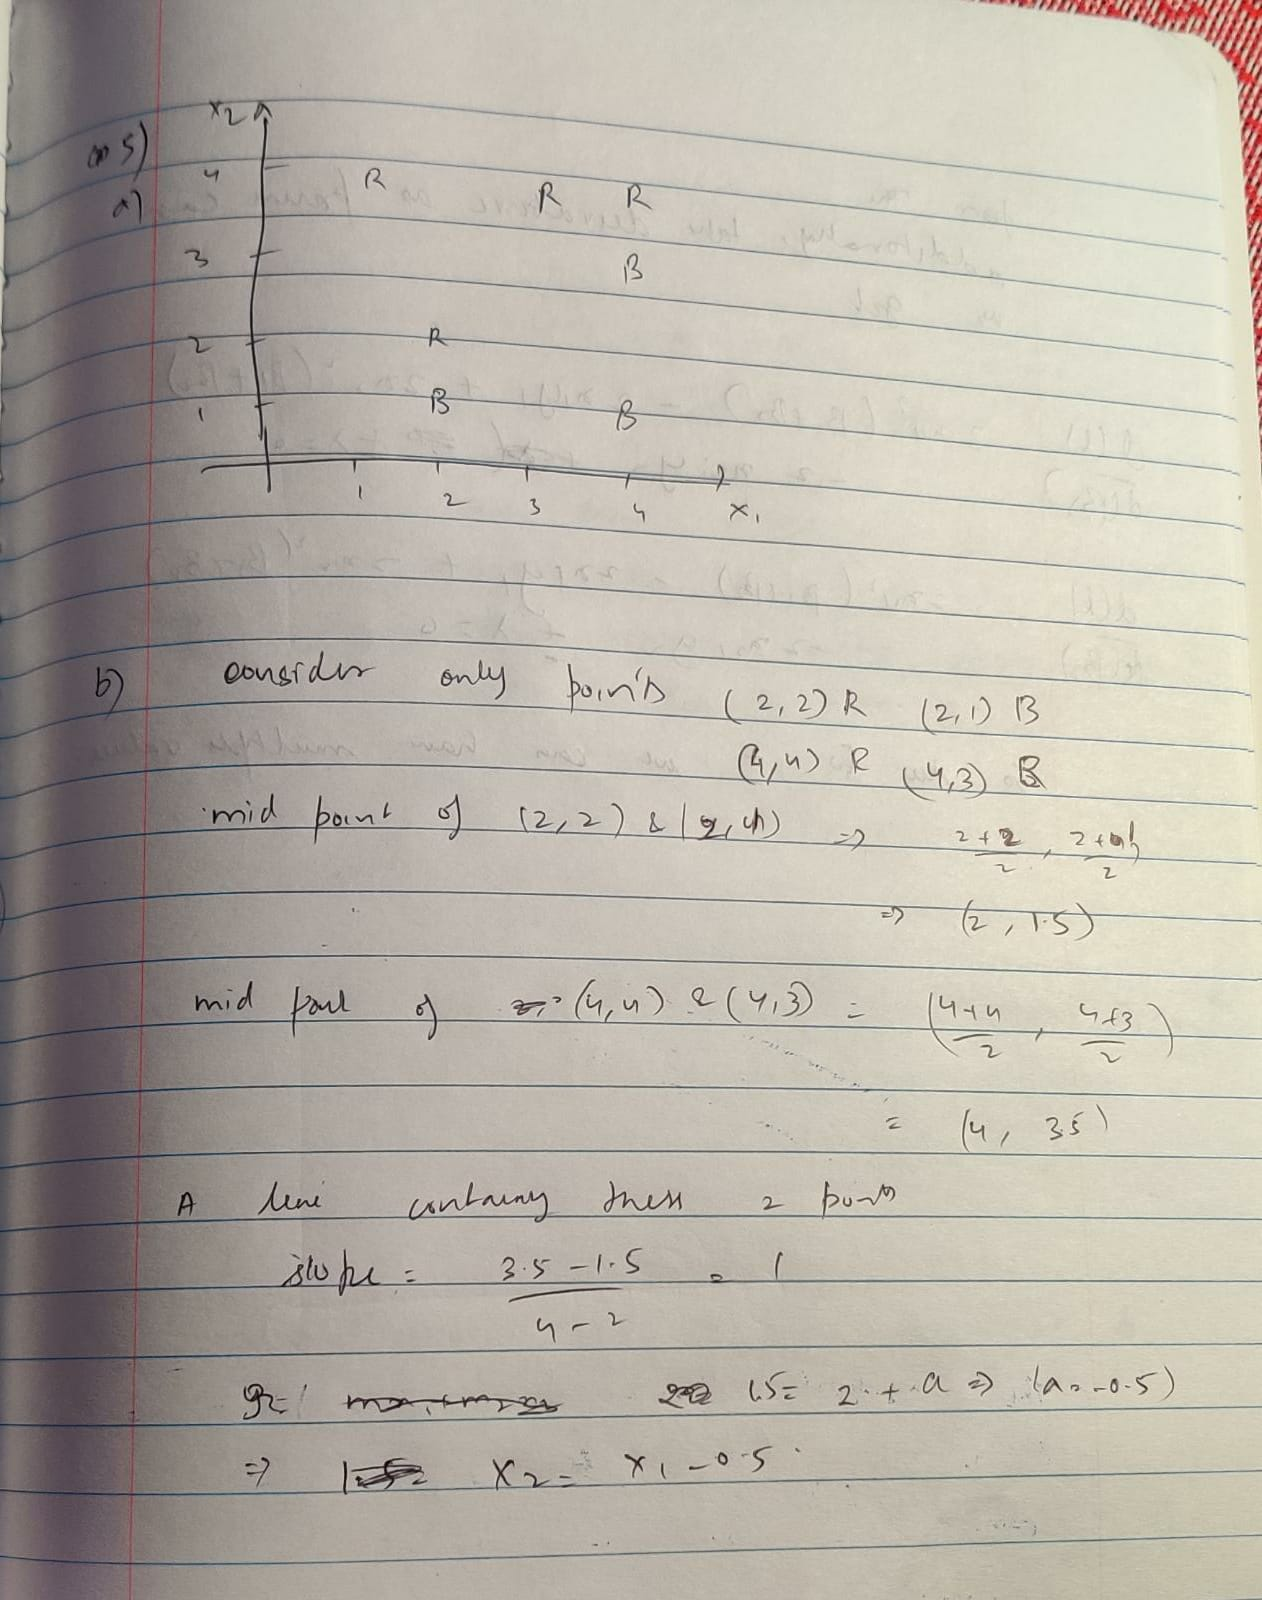

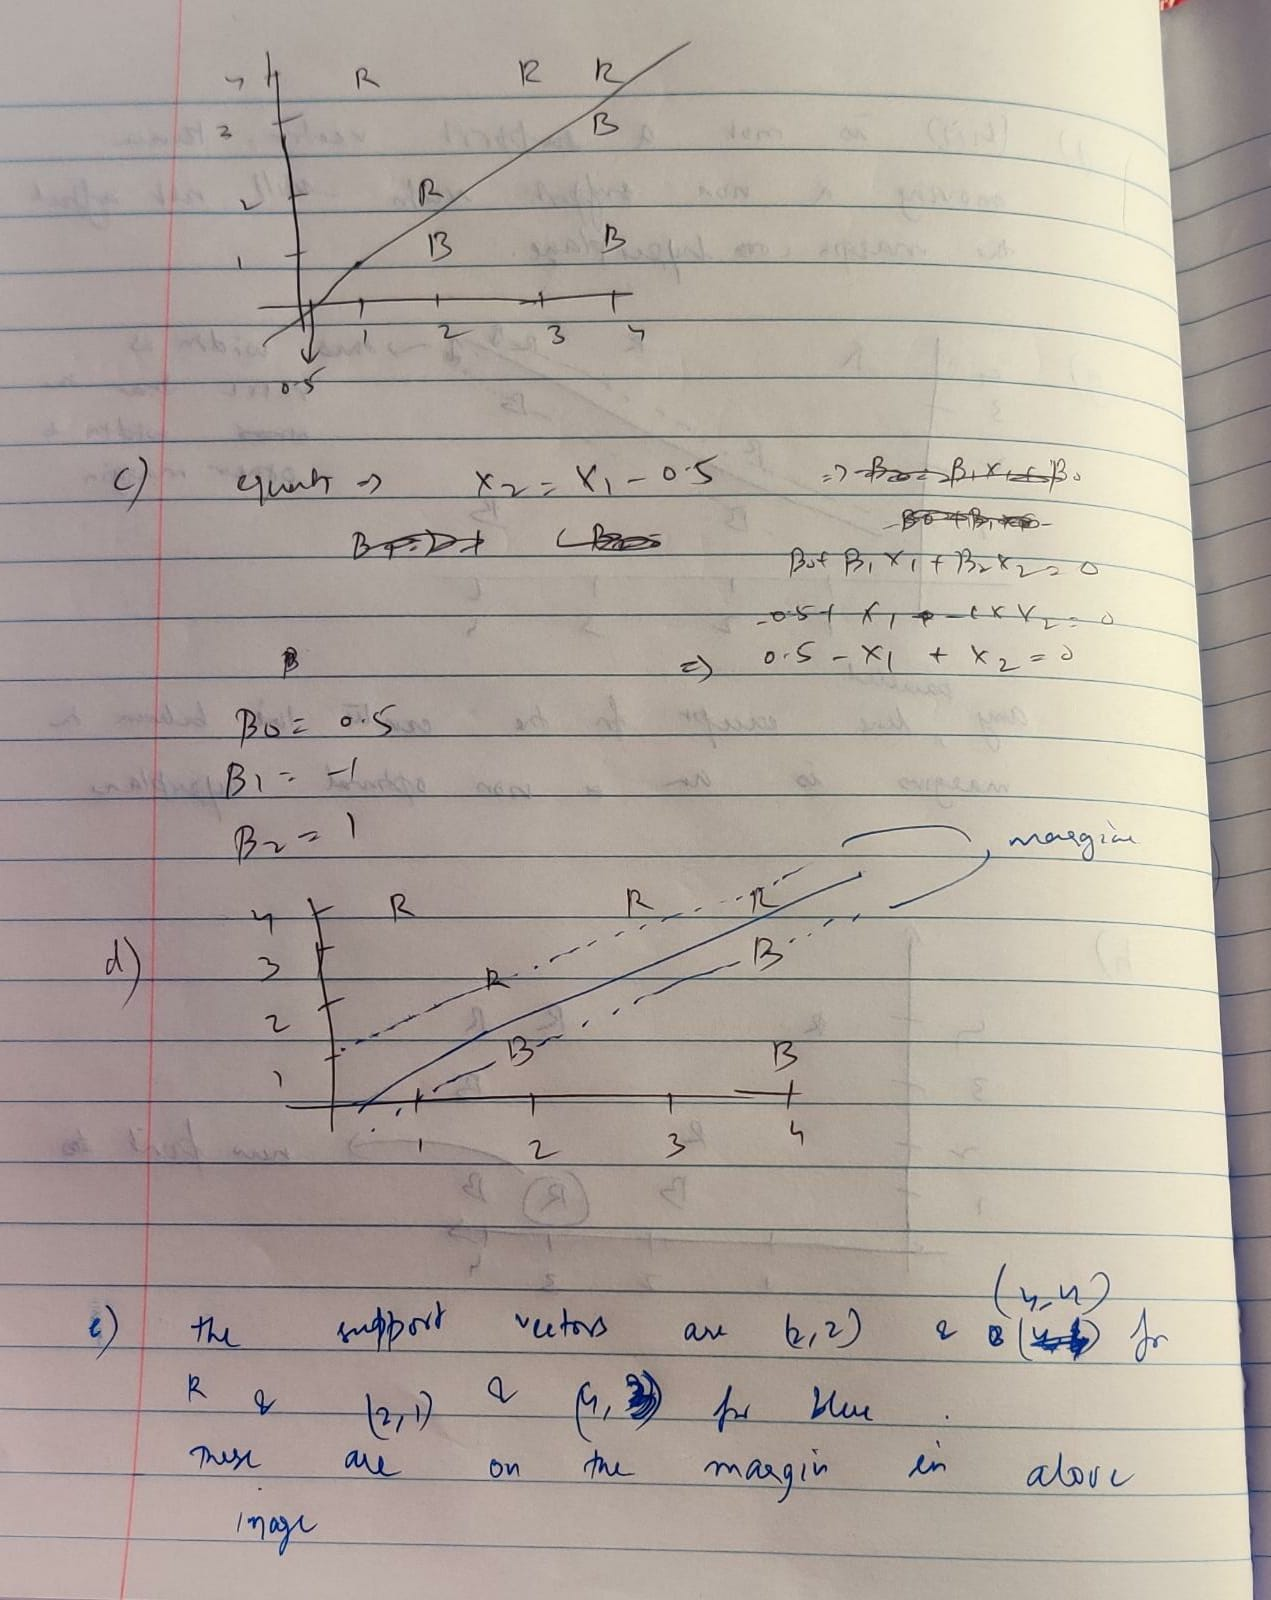

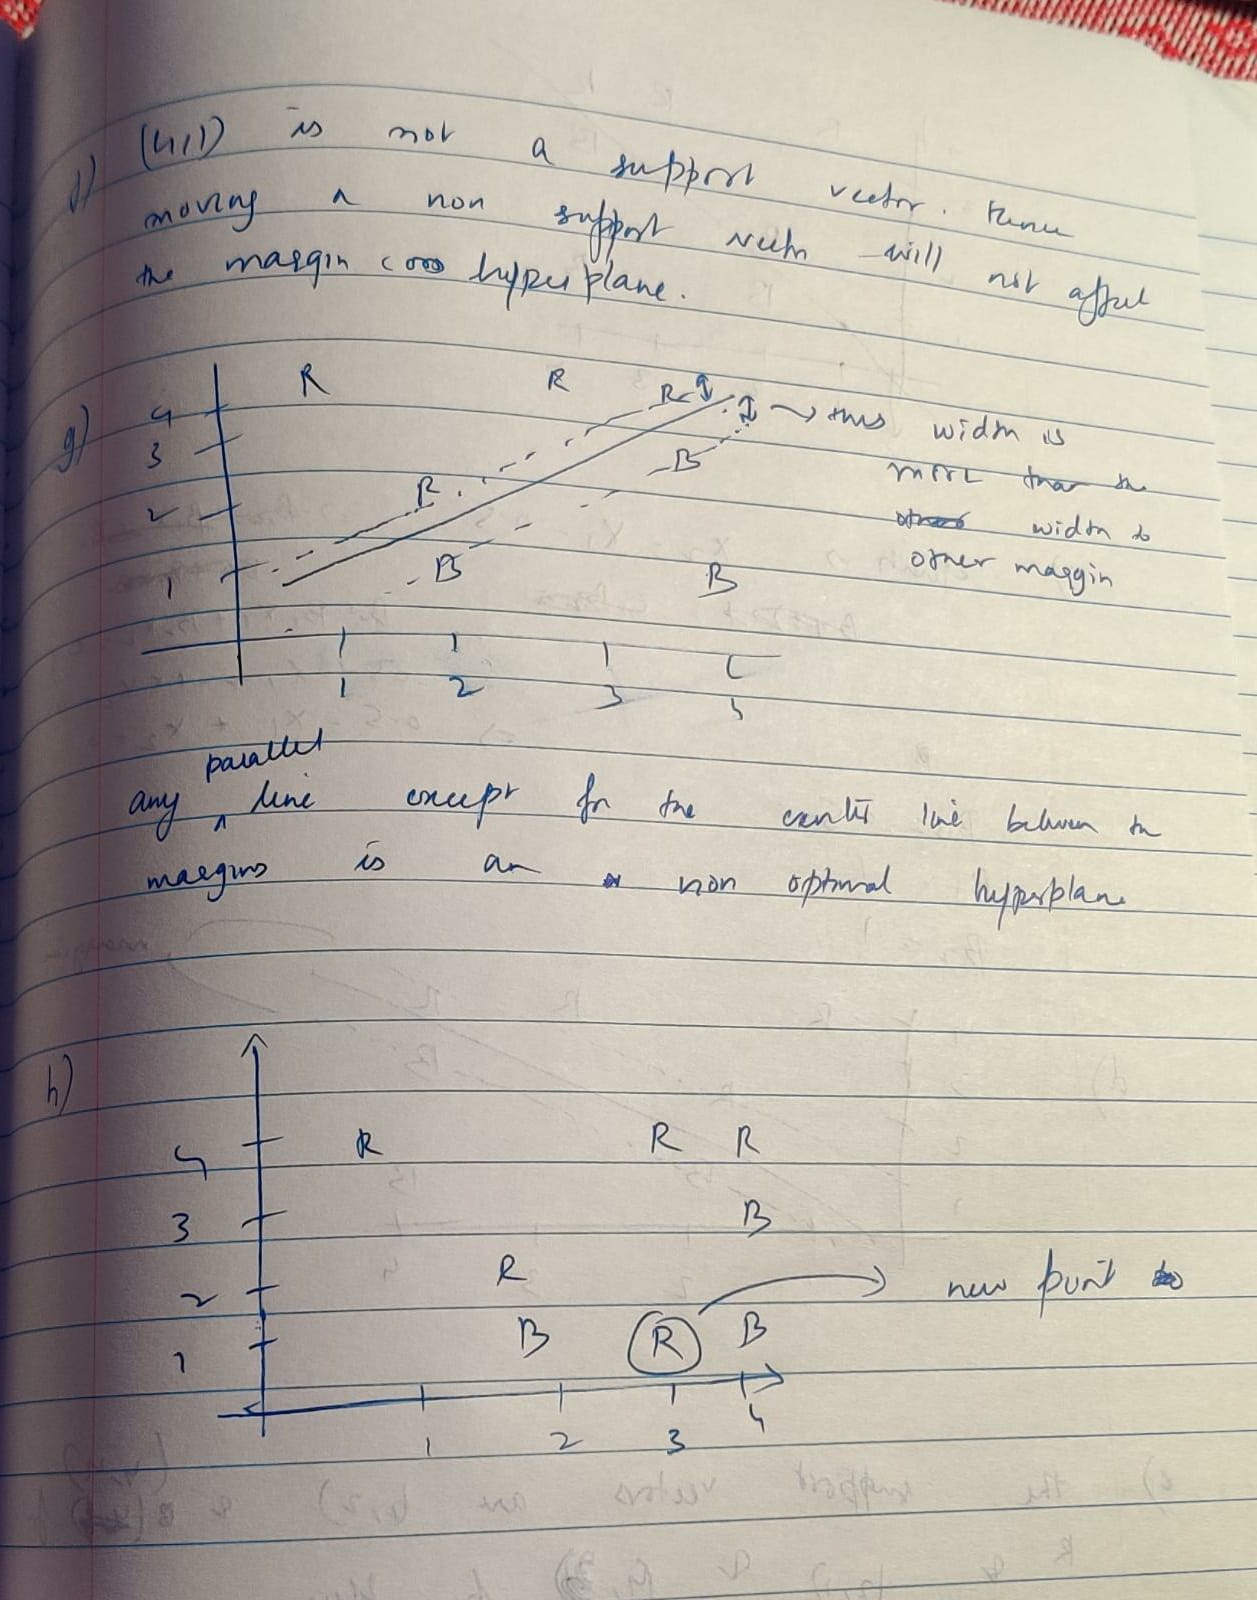

### references: 

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html

https://towardsdatascience.com/beginners-guide-to-xgboost-for-classification-problems-50f75aac5390

https://xgboost.readthedocs.io/en/stable/parameter.html